In [1]:
# # Install Libraries
# !pip install textblob
# !pip install tweepy
# !pip install pycountry
# !pip install wordcloud
# !pip install langdetect

# Business Problem:



In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import json

# from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [7]:
# nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/evanjays/nltk_data...


True

In [2]:
with open('/Users/evanjays/.secrets/twitter_creds.json') as f:
    creds = json.load(f)

df_2013 = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding = "ISO-8859-1")
df_2013.drop(6,inplace=True)

# Apple Dataset Accuracy

In [76]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+://\S+)"," ",x)
df_2013["clean_text"] = df_2013.tweet_text.map(remove_rt).map(rt)
df_2013["clean_text"] = df_2013.clean_text.str.lower()
df_2013.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,is_string,clean_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,True,i have a 3g iphone after 3 hrs tweeting at...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,True,know about awesome ipad iphone app that ...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,True,can not wait for ipad 2 also they should s...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,True,i hope this year s festival isn t as crashy ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,True,great stuff on fri sxsw marissa mayer goo...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product,True,new ipad apps for speechtherapy and communi...
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,True,sxsw is just starting ctia is around the co...
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,True,beautifully smart and simple idea rt wrote...
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,True,counting down the days to sxsw plus strong ca...
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,True,excited to meet the at sxsw so i can show t...


In [78]:
df_2013[['polarity', 'subjectivity']] = df_2013['clean_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df_2013['clean_text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df_2013.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df_2013.loc[index, 'sentiment'] = "positive"
    else:
        df_2013.loc[index, 'sentiment'] = "neutral"
    df_2013.loc[index, 'neg'] = neg
    df_2013.loc[index, 'neu'] = neu
    df_2013.loc[index, 'pos'] = pos
    df_2013.loc[index, 'compound'] = comp
df_2013.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,is_string,clean_text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,True,i have a 3g iphone after 3 hrs tweeting at...,-0.200000,0.400000,negative,0.193,0.807,0.000,-0.6486
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,True,know about awesome ipad iphone app that ...,0.466667,0.933333,positive,0.000,0.590,0.410,0.9100
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,True,can not wait for ipad 2 also they should s...,-0.155556,0.288889,neutral,0.000,1.000,0.000,0.0000
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,True,i hope this year s festival isn t as crashy ...,0.000000,0.000000,positive,0.000,0.643,0.357,0.7269
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,True,great stuff on fri sxsw marissa mayer goo...,0.800000,0.750000,positive,0.000,0.796,0.204,0.6249
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product,True,new ipad apps for speechtherapy and communi...,0.136364,0.454545,neutral,0.000,1.000,0.000,0.0000
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,True,sxsw is just starting ctia is around the co...,0.233333,0.566667,positive,0.000,0.822,0.178,0.6369
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,True,beautifully smart and simple idea rt wrote...,0.107143,0.500000,positive,0.000,0.652,0.348,0.7506
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,True,counting down the days to sxsw plus strong ca...,0.138889,0.511111,positive,0.000,0.820,0.180,0.5106
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,True,excited to meet the at sxsw so i can show t...,-0.062500,0.525000,negative,0.167,0.718,0.115,-0.2732


In [94]:
df_2013.is_there_an_emotion_directed_at_a_brand_or_product.value_counts() / 9098 * 100

No emotion toward brand or product    59.221807
Positive emotion                      32.732469
Negative emotion                       6.265113
I can't tell                           1.714663
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: float64

In [91]:
def sent_to_num(x):
    if x == "Negative emotion":
        return 0
    elif x == "Positive emotion":
        return 1
    elif x == "No emotion toward brand or product":
        return 2
    elif x == "negative":
        return 0
    elif x == "positive":
        return 1
    elif x == "neutral":
        return 2
    elif x == "I can't tell":
        return np.nan

df_2013['true_sent'].dropna(axis=0,inplace=True)

df_2013['true_sent'] = df_2013['is_there_an_emotion_directed_at_a_brand_or_product'].map(sent_to_num)
df_2013['pred_sent'] = df_2013['sentiment'].map(sent_to_num)

df_pred = df_2013.filter(['true_sent','pred_sent']).copy(deep=True)
df_pred.dropna(inplace=True)
accuracy_score(df_pred['true_sent'],df_pred['pred_sent'])

0.5262981199641898

In [101]:
df_2013.head().iloc[3].tweet_text

"@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw"

# DOGECOIN DATASET

In [3]:
# Authentication
consumerKey = creds['API Key']
consumerSecret = creds['API Key Secret']
accessToken = creds['Access Token']
accessTokenSecret = creds['Access Token Secret']
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [5]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input('Please enter keyword or hastag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  2500
positive number:  844
negative number:  133
neutral number:  1523


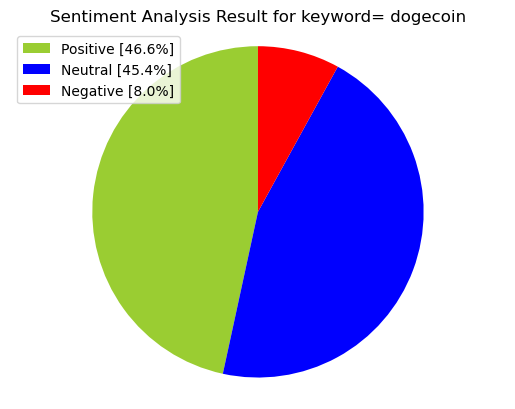

In [50]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [102]:
tweet_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,#businesswoman #tumblr #twitter #facebook #ins...,businesswoman tumblr twitter facebook ins...,0.000000,0.00,positive,0.0,0.791,0.209,0.4404
1,"RT @Doge_BUSD: 🚀📈💎Giveaway💎📈🚀\n\nRT, Follow us...",giveaway rt follow us and tag 3 frien...,0.000000,0.00,positive,0.0,0.829,0.171,0.4767
2,#linkedin #twitter #facebook #giftidea #instag...,linkedin twitter facebook giftidea instag...,0.000000,0.00,positive,0.0,0.791,0.209,0.4404
3,#linkedin #twitter #facebook #giftidea #instag...,linkedin twitter facebook giftidea instag...,0.000000,0.00,positive,0.0,0.791,0.209,0.4404
4,#linkedin #twitter #facebook #giftidea #instag...,linkedin twitter facebook giftidea instag...,0.000000,0.00,positive,0.0,0.791,0.209,0.4404
...,...,...,...,...,...,...,...,...,...
2495,@androidy21 #cryptotrading #BSCGems #BSC #100x...,cryptotrading bscgems bsc 100xgem shib ...,0.000000,0.00,neutral,0.0,1.000,0.000,0.0000
2496,RT @MikeDavisYT: Like and Retweet if you HODL ...,like and retweet if you hodl dogecoin,0.000000,0.00,positive,0.0,0.706,0.294,0.3612
2497,@elonmusk @BillyM2k Dogecoin,dogecoin,0.000000,0.00,neutral,0.0,1.000,0.000,0.0000
2498,RT @TheDefiJedi: $50 Giveaway 💸\n\nTo win:\n1️...,50 giveaway to win 1 join the live ama ...,0.468182,0.45,positive,0.0,0.585,0.415,0.8176


In [103]:
tweet_list.drop_duplicates(inplace = True)

In [104]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+://\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,#businesswoman #tumblr #twitter #facebook #ins...,businesswoman tumblr twitter facebook ins...,0.00,0.00,positive,0.000,0.791,0.209,0.4404
1,"RT @Doge_BUSD: 🚀📈💎Giveaway💎📈🚀\n\nRT, Follow us...",giveaway rt follow us and tag 3 frien...,0.00,0.00,positive,0.000,0.829,0.171,0.4767
2,#linkedin #twitter #facebook #giftidea #instag...,linkedin twitter facebook giftidea instag...,0.00,0.00,positive,0.000,0.791,0.209,0.4404
3,#linkedin #twitter #facebook #giftidea #instag...,linkedin twitter facebook giftidea instag...,0.00,0.00,positive,0.000,0.791,0.209,0.4404
4,#linkedin #twitter #facebook #giftidea #instag...,linkedin twitter facebook giftidea instag...,0.00,0.00,positive,0.000,0.791,0.209,0.4404
5,#tumblr #twitter #facebook #giftidea #instagra...,tumblr twitter facebook giftidea instagra...,0.00,0.00,positive,0.000,0.791,0.209,0.4404
6,RT @SashaFoxx90: 🐶VIKING FLOKI🐶\n\n✅LAUNCH NOW...,viking floki launch now 4 reflections ...,0.00,0.55,neutral,0.000,1.000,0.000,0.0000
7,RT @buffdogecoin: Audit by CertiK?\n\n#buffdog...,audit by certik buffdogecoin buffdogecoi...,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
8,@Marklien_ca has announced that the company is...,ca has announced that the company is now acc...,0.00,0.00,positive,0.000,0.833,0.167,0.3818
9,RT @cryptocom: Dogecoin is now listed on the h...,dogecoin is now listed on the app buy and...,0.35,0.65,positive,0.096,0.783,0.122,0.1531


In [106]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,#businesswoman #tumblr #twitter #facebook #ins...,businesswoman tumblr twitter facebook ins...,0.00,0.00,positive,0.000,0.791,0.209,0.4404
1,"RT @Doge_BUSD: 🚀📈💎Giveaway💎📈🚀\n\nRT, Follow us...",giveaway rt follow us and tag 3 frien...,0.00,0.00,positive,0.000,0.829,0.171,0.4767
2,#linkedin #twitter #facebook #giftidea #instag...,linkedin twitter facebook giftidea instag...,0.00,0.00,positive,0.000,0.791,0.209,0.4404
3,#linkedin #twitter #facebook #giftidea #instag...,linkedin twitter facebook giftidea instag...,0.00,0.00,positive,0.000,0.791,0.209,0.4404
4,#linkedin #twitter #facebook #giftidea #instag...,linkedin twitter facebook giftidea instag...,0.00,0.00,positive,0.000,0.791,0.209,0.4404
5,#tumblr #twitter #facebook #giftidea #instagra...,tumblr twitter facebook giftidea instagra...,0.00,0.00,positive,0.000,0.791,0.209,0.4404
6,RT @SashaFoxx90: 🐶VIKING FLOKI🐶\n\n✅LAUNCH NOW...,viking floki launch now 4 reflections ...,0.00,0.55,neutral,0.000,1.000,0.000,0.0000
7,RT @buffdogecoin: Audit by CertiK?\n\n#buffdog...,audit by certik buffdogecoin buffdogecoi...,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
8,@Marklien_ca has announced that the company is...,ca has announced that the company is now acc...,0.00,0.00,positive,0.000,0.833,0.167,0.3818
9,RT @cryptocom: Dogecoin is now listed on the h...,dogecoin is now listed on the app buy and...,0.35,0.65,positive,0.096,0.783,0.122,0.1531


In [107]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [108]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,619,47.73
positive,547,42.17
negative,131,10.10


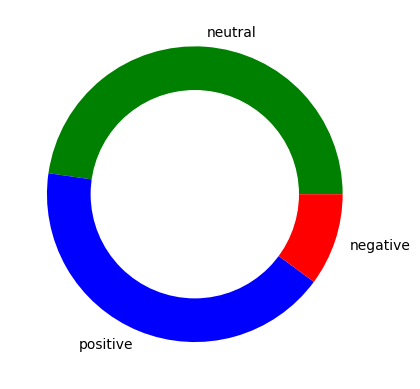

In [109]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [110]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [111]:
# #Creating wordcloud for all tweets
# create_wordcloud(tw_list["text"].values)

In [112]:
# #Creating wordcloud for positive sentiment
# create_wordcloud(tw_list_positive["text"].values)

In [113]:
# #Creating wordcloud for negative sentiment
# create_wordcloud(tw_list_negative["text"].values)

In [114]:
#Calculating tweet's length and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,94.90
neutral,78.83
positive,101.72


In [115]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,16.08
neutral,10.59
positive,14.47


In [116]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Applying Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove punctuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,#businesswoman #tumblr #twitter #facebook #ins...,businesswoman tumblr twitter facebook ins...,0.0,0.0,positive,0.0,0.791,0.209,0.4404,114,12,businesswoman tumblr twitter facebook ins...,"[, businesswoman, tumblr, twitter, facebook, i...","[, businesswoman, tumblr, twitter, facebook, i...","[, businesswoman, tumblr, twitter, facebook, i..."
1,"RT @Doge_BUSD: 🚀📈💎Giveaway💎📈🚀\n\nRT, Follow us...",giveaway rt follow us and tag 3 frien...,0.0,0.0,positive,0.0,0.829,0.171,0.4767,126,18,giveaway rt follow us and tag 3 frien...,"[, giveaway, rt, follow, us, and, tag, 3, frie...","[, giveaway, rt, follow, us, tag, 3, friends, ...","[, giveaway, rt, follow, us, tag, 3, friend, 2..."
2,#linkedin #twitter #facebook #giftidea #instag...,linkedin twitter facebook giftidea instag...,0.0,0.0,positive,0.0,0.791,0.209,0.4404,114,12,linkedin twitter facebook giftidea instag...,"[, linkedin, twitter, facebook, giftidea, inst...","[, linkedin, twitter, facebook, giftidea, inst...","[, linkedin, twitter, facebook, giftidea, inst..."
3,#linkedin #twitter #facebook #giftidea #instag...,linkedin twitter facebook giftidea instag...,0.0,0.0,positive,0.0,0.791,0.209,0.4404,113,12,linkedin twitter facebook giftidea instag...,"[, linkedin, twitter, facebook, giftidea, inst...","[, linkedin, twitter, facebook, giftidea, inst...","[, linkedin, twitter, facebook, giftidea, inst..."
4,#linkedin #twitter #facebook #giftidea #instag...,linkedin twitter facebook giftidea instag...,0.0,0.0,positive,0.0,0.791,0.209,0.4404,111,12,linkedin twitter facebook giftidea instag...,"[, linkedin, twitter, facebook, giftidea, inst...","[, linkedin, twitter, facebook, giftidea, inst...","[, linkedin, twitter, facebook, giftidea, inst..."


In [117]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
# print(countVectorizer.get_feature_names())
# 1281 Number of reviews has 2966 words
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

1297 Number of reviews has 2656 words


,,aaa,aabedeafcacafbeeccebabeea,aaeabbcbbaeadedcbfbadf,aav,abddbcccdcfcecebecdebfb,abdedccdffedaafdacacfcafca,abil,abileri,abl,...,za,zaman,zark,zaten,zcash,zen,zero,zm,zoopredict,zoot
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
dogecoin,817
doge,341
gift,178
bitcoin,172
crypto,139
twitter,130
instagram,122
facebook,120
socialmedia,119
price,100


In [119]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('twitter facebook', 114),
 ('facebook instagram', 114),
 ('deal gift', 91),
 ('tumblr twitter', 73),
 ('gift gifts', 72),
 ('socialmedia pinterest', 71),
 ('dogecoin doge', 59),
 ('instagram dogecoin', 52),
 ('dogecoin socialmedia', 50),
 ('dogecoin whale', 50),
 ('whale alert', 50),
 ('alert tx', 50),
 ('doge deal', 49),
 ('pinterest dogecoin', 43),
 ('dogecoin deal', 43),
 ('linkedin twitter', 41),
 ('cryptocurrency future', 34),
 ('bitcoin ankr', 33),
 ('ankr litecoin', 31),
 ('doge dogecoin', 31)]

In [120]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('twitter facebook instagram', 108),
 ('tumblr twitter facebook', 71),
 ('deal gift gifts', 67),
 ('facebook instagram dogecoin', 50),
 ('dogecoin whale alert', 50),
 ('whale alert tx', 50),
 ('instagram dogecoin socialmedia', 49),
 ('doge deal gift', 47),
 ('pinterest dogecoin deal', 41),
 ('socialmedia pinterest dogecoin', 40),
 ('dogecoin deal gift', 40),
 ('linkedin twitter facebook', 37),
 ('bitcoin ankr litecoin', 30),
 ('dogecoin socialmedia pinterest', 28),
 ('socialmedia pinterest doge', 27),
 ('instagram doge socialmedia', 27),
 ('doge socialmedia pinterest', 27),
 ('pinterest doge deal', 26),
 ('facebook instagram doge', 26),
 ('bitcoin tumblr twitter', 23)]

## MODEL BUILDER

In [ ]:
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend([w.lower() for w in nltk.corpus.names.words()])

def skip_unwanted(pos_tuple):
    word, tag = pos_tuple
    if not word.isalpha() or word in unwanted:
        return False
    if tag.startswith("NN"):
        return False
    return True

positive_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["pos"]))
)]
negative_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["neg"]))
)]